In [1]:
from numba import jit
import numpy as np
import time
import timeit
import matplotlib.pyplot as plt

In [70]:
@jit(nopython=True)
def SpecularReflect(vel, normal):
    NewVwl =  vel - 2*vel@normal*normal
    return NewVwl


vel = np.array([-1, 0, -1], dtype=float)

theta = np.array([-1, 0, 0], dtype=float)

# theta = np.random.rand(3)
# vel = np.random.rand(3)
SpecularReflect(vel, theta)

array([ 1.,  0., -1.])

In [64]:
react_table = np.array([[[0.700, 0, 1], [0.300, 0, 1]],
                        [[0.200, -1, 0], [0.075, 0, -1]]])

@jit(nopython=True)
def SpecularReflect(vel, normal):
    return vel - 2*vel@normal*normal

# etching act on film, depo need output
@jit(nopython=True)
def reaction_yield(parcel, film, theta):
    num_parcels = parcel.shape[0]
    num_reactions = react_table.shape[1]
    choice = np.random.rand(parcel.shape[0], react_table.shape[1])
    reactList = np.ones(parcel.shape[0])*-1
    for i in range(num_parcels):
        for j in range(num_reactions):
            if film[i, j] <= 0:
                choice[i, j] = 1
    depo_parcel = np.zeros(parcel.shape[0])
    for i in range(parcel.shape[0]):
        acceptList = np.zeros(react_table.shape[1], dtype=np.bool_)
        for j in range(film.shape[1]):
            react_rate = react_table[int(parcel[i, -1]), j, 0]
            if react_rate > choice[i, j]:
                acceptList[j] = True
        react_choice_indices = np.where(acceptList)[0]
        if react_choice_indices.size > 0:
            react_choice = np.random.choice(react_choice_indices)
            reactList[i] = react_choice
            if np.sum(react_table[int(parcel[i, -1]), react_choice, 1:]) > 0:
                depo_parcel[i] = 1
            if np.sum(react_table[int(parcel[i, -1]), react_choice, 1:]) < 0:
                depo_parcel[i] = -1
    for i in range(parcel.shape[0]):
        if depo_parcel[i] == -1:
            film[i, :] += 0.01 * react_table[int(parcel[i, -1]), int(reactList[i]), 1:]
        if reactList[i] == -1:
            parcel[i,3:6] = SpecularReflect(parcel[i,3:6], theta[i])

    return film, parcel, reactList, depo_parcel


film = np.zeros((10, 2))

film[:, 0] = 0.5
film[:, 1] = 0.5
print(film)
# parcel = np.random.choice(2, size=10)
# particle data struction np.array([posX, posY, posZ, velX, velY, velZ, i, j, k, typeID])
# parcel = np.ones(10, dtype=int)
parcel = np.ones((10, 10))
parcel[:5, -1] = 0
print(parcel)
# test1 = UnitTest(parcel, film)
# print(test1.testReact())
theta = np.random.rand(30).reshape(10,3)
film, parcel, reactList, depo_parcel = reaction_yield(parcel, film, theta)

print('-------------')
print(film)

print('---------------')
print('reactList',reactList)
print('depoparcel', depo_parcel)
print('parcel', parcel[:, -1])

[[0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
-------------
[[0.5  0.5 ]
 [0.5  0.5 ]
 [0.5  0.5 ]
 [0.5  0.5 ]
 [0.5  0.5 ]
 [0.49 0.5 ]
 [0.5  0.5 ]
 [0.5  0.5 ]
 [0.5  0.5 ]
 [0.5  0.5 ]]
---------------
reactList [ 0.  0. -1.  0.  0.  0. -1. -1. -1. -1.]
depoparcel [ 1.  1.  0.  1.  1. -1.  0.  0.  0.  0.]
parcel [0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]


In [57]:
np.where(reactList != -1)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64),)

In [44]:
react_table = np.array([[[0.700, 0, 1], [0.300, 0, 1]],
                        [[0.200, -1, 0], [0.075, 0, -1]]])

# etching act on film, depo need output
@jit(nopython=True)
def reaction_yield(parcel, film):
    num_parcels = parcel.shape[0]
    num_reactions = react_table.shape[1]
    choice = np.random.rand(parcel.shape[0], react_table.shape[1])
    # print('choice', choice)
    reactList = np.ones(parcel.shape[0])*-1
    indiceFilm = film == 0
    # print(indiceFilm.shape)
    # choice[indiceFilm] = 0

    for i in range(num_parcels):
        for j in range(num_reactions):
            if film[i, j] <= 0:
                choice[i, j] = 1

    # print('choice', choice)   

    depo_parcel = np.zeros(parcel.shape[0])
    for i in range(parcel.shape[0]):
        acceptList = np.zeros(react_table.shape[1], dtype=np.bool_)
        for j in range(film.shape[1]):
            react_rate = react_table[parcel[i], j, 0]
            if react_rate > choice[i, j]:
                acceptList[j] = True
        # print( 'react_table',react_table[parcel[i], :, 0])
        # # print(choice[i])
        # print('accept',acceptList)  
        # react_choice_indices = np.random.choice(int(np.sum(acceptList)))
        react_choice_indices = np.where(acceptList)[0]
        print( 'react_choice_indices', react_choice_indices)
        if react_choice_indices.size > 0:
            react_choice = np.random.choice(react_choice_indices)
            reactList[i] = react_choice
            # film[i, react_choice] -= 0.01      # left
            # print('react type', react_table[parcel[i], react_choice, 1:])
            if np.sum(react_table[parcel[i], react_choice, 1:]) > 0:
                depo_parcel[i] = 1
            if np.sum(react_table[parcel[i], react_choice, 1:]) < 0:
                depo_parcel[i] = -1


            etching_pick = np.where(depo_parcel == -1)
            # film[i, :] += 0.01*react_table[parcel[i], react_choice, 1:]   # right
    for i in range(parcel.shape[0]):
        if depo_parcel[i] == -1:
            film[i, :] += 0.01 * react_table[parcel[i], int(reactList[i]), 1:]
    # film[etching_pick, :] += 0.01*react_table[parcel[etching_pick], react_choice, 1:]
            # react_gen = react_table[parcel[i], react_choice, 1]
            # if react_gen > 0:
            #     film[i, int(react_gen)-1] += 0.01
            # else:
            #     parcelGen[i] = -react_gen
                
    return film, reactList, depo_parcel


film = np.zeros((10, 2))

film[:, 0] = 0.5
film[:, 1] = 0.5
print(film)
# parcel = np.random.choice(2, size=10)
parcel = np.ones(10, dtype=int)
parcel[:5] = 0
print(parcel)
# test1 = UnitTest(parcel, film)
# print(test1.testReact())
film, reactList, depo_parcel = reaction_yield(parcel, film)

print('-------------')
print(film)

print('---------------')
print('reactList',reactList)

print('depoparcel', depo_parcel)

[[0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]]
[0 0 0 0 0 1 1 1 1 1]
react_choice_indices [0]
react_choice_indices []
react_choice_indices [0]
react_choice_indices [1]
react_choice_indices []
react_choice_indices []
react_choice_indices []
react_choice_indices [0]
react_choice_indices [0]
react_choice_indices []
-------------
[[0.5  0.5 ]
 [0.5  0.5 ]
 [0.5  0.5 ]
 [0.5  0.5 ]
 [0.5  0.5 ]
 [0.5  0.5 ]
 [0.5  0.5 ]
 [0.49 0.5 ]
 [0.49 0.5 ]
 [0.5  0.5 ]]
---------------
reactList [ 0. -1.  0.  1. -1. -1. -1.  0.  0. -1.]
depoparcel [ 1.  0.  1.  1.  0.  0.  0. -1. -1.  0.]


In [10]:
# 定义反应表和初始的 film 元素
react_table = np.array([[[0.700, 0, 1], [0.300, 0, 1]],
                        [[0.200, -1, 0], [0.075, 0, -1]]])
# film_elemnt = np.array([1, 0], dtype=float)
film_elemnt = np.array([10, 20], dtype=float)
def reaction(gas, film):
    # 计算总长度
    total_length = int(film.sum())

    # 预分配反应类型和反应速率
    reaction_type = np.empty(total_length, dtype=int)
    reaction_rate = np.empty(total_length, dtype=float)

    # 填充反应类型和反应速率
    current_index = 0
    for i in range(film.shape[0]):
        length = int(film[i])
        reaction_type[current_index:current_index + length] = i
        reaction_rate[current_index:current_index + length] = react_table[gas, i, 0]
        current_index += length

    # 生成随机数列以确定反应发生的概率
    reaction_list = np.random.rand(total_length)

    # 筛选出发生反应的粒子
    reaction_indices = np.where(reaction_rate > reaction_list)[0]
    
    # 如果有反应发生，随机选择一个反应
    if reaction_indices.size > 0:
        reaction_choice = np.random.choice(reaction_indices, 1)
        reaction_particle = reaction_type[reaction_choice][0]
        # print(reaction_particle)
        # 更新 film 元素的状态
        filmAddtion = np.array(react_table[gas, reaction_particle, 1:], dtype=int)
        return filmAddtion, reaction_particle, np.sum(react_table[gas, reaction_particle, 1:]) # film, react_type, etchingDepo 
    else:
        return np.zeros_like(film), -1, 0
    

print(reaction(0, film_elemnt))

(array([0, 1]), 1, 1.0)


In [424]:
#react_t g[Cu]   s  [1,     2]
#react_t g[Cu] g\s  [Si,   Cu]
            #  Cu    0.7,  0.3   
            #  Ar    0.2   0.075
react_table = np.array([[[0.7, 1, 2], [0.3, 0, 2]],
                        [[0.2, -1, 0], [0.075, 0, -1]]])


@jit(nopython=True)
def reaction(parcel, film):
    num_parcels = parcel.shape[0]
    num_reactions = react_table.shape[1]
    choice = np.random.rand(num_parcels, num_reactions)
    print(choice.shape)
    indiceFilm = film == 0
    print(indiceFilm.shape)
    # choice[indiceFilm] = 0

    # Indicate if the film is zero
    for i in range(num_parcels):
        for j in range(num_reactions):
            if film[i, j] == 0:
                choice[i, j] = 1


    print(choice)
    parcelGen = np.zeros(num_parcels)
    reactList = np.zeros(num_parcels)

    for i in range(num_parcels):
        acceptList = react_table[parcel[i], :, 0]/choice[i] > 1
        print(react_table[parcel[i], :, 0])
        print(choice[i])
        print(acceptList)
        react_choice_indices = np.where(acceptList)[0]
        # print(react_choice_indices)
        if react_choice_indices.size > 0:
            react_choice = np.random.choice(react_choice_indices)
            reactList[i] = react_choice
            film[i, react_choice] -= 0.01
            react_gen = react_table[parcel[i], react_choice, 1]
            if react_gen > 0:
                film[i, int(react_gen) - 1] += 0.01
            else:
                parcelGen[i] = -react_gen
    
    return film, parcelGen, reactList

class UnitTest:
    def __init__(self, parcel, film):
        self.parcel = parcel
        self.film = film
    
    def testReact(self):
        film, parcelGen, reactList = reaction(self.parcel, self.film)
        return film, parcelGen, reactList

film = np.zeros((10, 2))

film[:5, 0] = 1
film[5:, 1] = 1
print(film)
parcel = np.random.choice(3, size=10)
print(parcel)
# test1 = UnitTest(parcel, film)
# print(test1.testReact())
film, parcelGen, reactList = reaction(parcel, film)

print('-------------')
print(film)
print('-------------')
print(parcelGen)
print('---------------')
print(reactList)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[2 0 2 1 1 0 2 1 0 0]
(10, 2)
(10, 2)
[[0.87371415 1.        ]
 [0.73144343 1.        ]
 [0.39864057 1.        ]
 [0.64276348 1.        ]
 [0.0105777  1.        ]
 [1.         0.70438947]
 [1.         0.04220356]
 [1.         0.20144074]
 [1.         0.89120776]
 [1.         0.03815122]]
[0.7 0.3]
[0.87371415 1.        ]
[ True False]
[0.7 0.3]
[0.73144343 1.        ]
[False False]
[0.7 0.3]
[0.39864057 1.        ]
[ True False]
[0.2   0.075]
[0.64276348 1.        ]
[False False]
[0.2   0.075]
[0.0105777 1.       ]
[ True False]
[0.7 0.3]
[1.         0.70438947]
[False False]
[0.7 0.3]
[1.         0.04220356]
[ True False]
[0.2   0.075]
[1.         0.20144074]
[False False]
[0.7 0.3]
[1.         0.89120776]
[False False]
[0.7 0.3]
[1.         0.03815122]
[False  True]
-------------
[[ 0.99  0.  ]
 [ 1.    0.  ]
 [ 0.99  0.  ]
 [ 1.    0.  ]
 [ 0.99  0.  ]
 [ 0.    1.  ]
 [-0.01  1.  ]
 [ 0.    1.

In [423]:
0.7 > 0.7196888 

False

In [397]:
@jit(nopython=True)
def testnumba1():
    film = np.zeros((10, 2))

    film[:5, 0] = 1
    film[5:, 1] = 1
    print(film)

    indiceFilm = film == 0
    return indiceFilm

testnumba1()

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


array([[False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False]])

In [386]:
react_table = np.array([[[0.01, 2], [0.01, 3], [0.01, 4], [0.01, -4], [0.05, 7], [0.00, 0], [0.05, 8], [0.00, 0], [0.06, 10], [0.00, 0]],
                        [[0.05, 5], [0.00, 0], [0.00, 0], [0.00, 0], [0.05, 6], [0.00, 0], [0.00, 0], [0.00, 0], [0.00, 0], [0.00, 0]],
                        [[0.27, -1], [0.27, -2], [0.27, -3], [0.27, -4], [0.27, -5], [0.27, -6], [0.27, -7], [0.27, -8], [0.27, -9], [0.27, -10]]])


print(react_table.shape)

(3, 10, 2)


In [452]:
#solid = film[i, j, k, 10][Si, SiF1, SiF2, SiF3, SiO SiO2, SiOF, SiOF2, SiO2F, SiO2F2]
#react_t g[F, O, ion] s  [1,          2,           3,          4,       5 ,   6,    7,    8,   9,  10]
#react_t g[F, O, ion] s  [Si,       SiF1,       SiF2,       SiF3,      SiO, SiO2, SiOF, SiOF2, SiO2F,SiO2F2]

react_table = np.array([[[0.01, 2], [0.01, 3], [0.01, 4], [0.01, -4], [0.05, 7], [0.00, 0], [0.05, 8], [0.00, 0], [0.06, 10], [0.00, 0]],
                        [[0.05, 5], [0.00, 0], [0.00, 0], [0.00, 0], [0.05, 6], [0.00, 0], [0.00, 0], [0.00, 0], [0.00, 0], [0.00, 0]],
                        [[0.27, -1], [0.27, -2], [0.27, -3], [0.27, -4], [0.27, -5], [0.27, -6], [0.27, -7], [0.27, -8], [0.27, -9], [0.27, -10]]])

@jit(nopython=True)
def reaction(parcel, film):
    choice = np.random.rand(parcel.shape[0], react_table.shape[1])
    parcelGen = np.zeros(parcel.shape[0])
    reactList = np.zeros(parcel.shape[0])
    for i in range(parcel.shape[0]):
        acceptList = np.zeros(react_table.shape[1], dtype=np.bool_)
        
        for j in range(film.shape[1]):
            react_rate = react_table[parcel[i], j, 0]
            if react_rate > choice[i, j]:
                acceptList[j] = True
        
        # react_choice_indices = np.random.choice(int(np.sum(acceptList)))
        react_choice_indices = np.where(acceptList)[0]
        # print(react_choice_indices)
        if react_choice_indices.size > 0:
            react_choice = np.random.choice(react_choice_indices)
            reactList[i] = react_choice
            film[i, react_choice] -= 0.01
            react_gen = react_table[parcel[i], react_choice, 1]
            if react_gen > 0:
                film[i, int(react_gen)-1] += 0.01
            else:
                parcelGen[i] = -react_gen
                
    return film, parcelGen, reactList



class UnitTest:
    def __init__(self, parcel, film):
        self.parcel = parcel
        self.film = film
    
    def testReact(self):
        film, parcelGen, reactList = reaction(self.parcel, self.film)
        return film, parcelGen, reactList


film = np.zeros((10, 10))
parcel = np.random.choice(3, size=10)
print(parcel)
# test1 = UnitTest(parcel, film)
# print(test1.testReact())
film, parcelGen, reactList = reaction(parcel, film)
print(film)
print('-------------')
print(parcelGen)
print('---------------')
print(reactList)

[2 2 1 0 1 1 0 1 2 1]
[[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.   -0.01  0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.   -0.01  0.    0.01  0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.   -0.01  0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]]
-------------
[0. 5. 0. 0. 0. 0. 0. 0. 8. 0.]
---------------
[0. 4. 0. 0. 0. 0. 4. 0. 7. 0.]


In [124]:
film = np.zeros((1000, 10))
parcel = np.random.choice(3, size=1000)

test1 = UnitTest(parcel, film)
test1.testReact()
numba_time = timeit.timeit(lambda: test1.testReact(), number=100)
print(f"Numba time: {numba_time:.6f} seconds")

Numba time: 1.360035 seconds


In [147]:
film = np.zeros((100, 10))
parcel = np.random.choice(3, size=100)

test1 = UnitTest(parcel, film)
test1.testReact()
numba_time = timeit.timeit(lambda: test1.testReact(), number=10000)
print(f"Numba time: {numba_time:.6f} seconds")


Numba time: 0.320966 seconds


In [385]:
react_table = np.array([[[0.01, 2], [0.01, 3], [0.01, 4], [0.01, -4], [0.05, 7], [0.00, 0], [0.05, 8], [0.00, 0], [0.06, 10], [0.00, 0]],
                        [[0.05, 5], [0.00, 0], [0.00, 0], [0.00, 0], [0.05, 6], [0.00, 0], [0.00, 0], [0.00, 0], [0.00, 0], [0.00, 0]],
                        [[0.27, -1], [0.27, -2], [0.27, -3], [0.27, -4], [0.27, -5], [0.27, -6], [0.27, -7], [0.27, -8], [0.27, -9], [0.27, -10]]])

@jit(nopython=True)
def reaction(parcel, film):
    num_parcels = parcel.shape[0]
    num_reactions = react_table.shape[1]
    choice = np.random.rand(num_parcels, num_reactions)
    parcelGen = np.zeros(num_parcels)
    reactList = np.zeros(num_parcels)

    for i in range(num_parcels):
        acceptList = react_table[parcel[i], :, 0] > choice[i]
        react_choice_indices = np.where(acceptList)[0]
        # print(react_choice_indices)
        if react_choice_indices.size > 0:
            react_choice = np.random.choice(react_choice_indices)
            reactList[i] = react_choice
            film[i, react_choice] -= 0.01
            react_gen = react_table[parcel[i], react_choice, 1]
            if react_gen > 0:
                film[i, int(react_gen) - 1] += 0.01
            else:
                parcelGen[i] = -react_gen
    
    return film, parcelGen, reactList

class UnitTest:
    def __init__(self, parcel, film):
        self.parcel = parcel
        self.film = film
    
    def testReact(self):
        film, parcelGen, reactList = reaction(self.parcel, self.film)
        return film, parcelGen, reactList

film = np.zeros((10, 10))
parcel = np.random.choice(3, size=10)
print(parcel)
# test1 = UnitTest(parcel, film)
# print(test1.testReact())
film, parcelGen, reactList = reaction(parcel, film)
print(film)
print('-------------')
print(parcelGen)
print('---------------')
print(reactList)


[0 2 2 1 1 1 2 0 2 1]
[[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.   -0.01  0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.   -0.01  0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.   -0.01  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.   -0.01  0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]]
-------------
[0. 4. 8. 0. 0. 0. 3. 0. 4. 0.]
---------------
[0. 3. 7. 0. 0. 0. 2. 0. 3. 0.]


In [140]:
film = np.zeros((100, 10))
parcel = np.random.choice(3, size=100)

test1 = UnitTest(parcel, film)
test1.testReact()
numba_time = timeit.timeit(lambda: test1.testReact(), number=10000)
print(f"Numba time: {numba_time:.6f} seconds")


Numba time: 0.345110 seconds


In [134]:
def test_performance():
    film = np.zeros((10, 10))
    parcel = np.random.choice(3, size=10)
    test1 = UnitTest(parcel, film)
    
    # 测试反应函数的性能
    performance_time = timeit.timeit(lambda: test1.testReact(), number=1000)
    print(f"Performance time: {performance_time:.6f} seconds")

test_performance()

Performance time: 0.005934 seconds


In [108]:
film = np.zeros((100, 10))
parcel = np.random.choice(3, size=100)

test1 = UnitTest(parcel, film)
test1.testReact()
numba_time = timeit.timeit(lambda: test1.testReact(), number=100)
print(f"Numba time: {numba_time:.6f} seconds")

Numba time: 0.002657 seconds


In [110]:
film = np.zeros((100, 10))
parcel = np.random.choice(3, size=100)

test1 = UnitTest(parcel, film)
test1.testReact()
numba_time = timeit.timeit(lambda: test1.testReact(), number=100)
print(f"Numba time: {numba_time:.6f} seconds")

Numba time: 0.109467 seconds


In [148]:
def diffDeflection(ur):
    kB = 1.380649e-23
    Al_m = 44.803928e-27
    N_A = 6.02214076*10**23
    Ar_m = 39.938/(N_A*1000)
    Tw = 300

    return Al_m/(kB*Tw)*ur*np.exp(-Al_m*ur*ur/(2*kB*Tw))

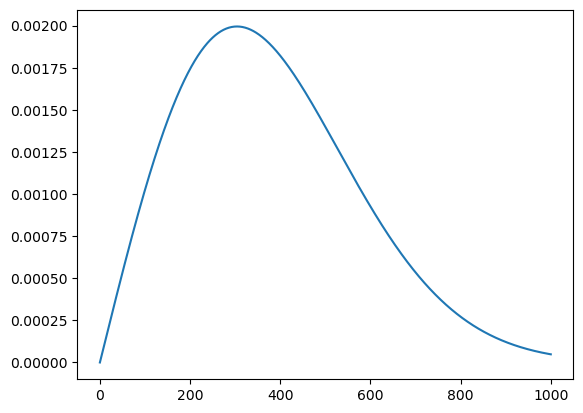

In [151]:
x = np.linspace(0, 1000, 1000)
y = diffDeflection(x)

fig, ax = plt.subplots(1, 1)

ax.plot(x, y)

In [154]:
def yield_func( theta):
    yield_hist = np.array([0, 10, 90, 100])
    sputterY = np.zeros_like(theta)
    indice = np.logical_and(theta > yield_hist[0], theta < yield_hist[1])
    indice |= np.logical_and(theta > yield_hist[2], theta < yield_hist[3])
    sputterY[indice] = 1
    return sputterY


In [155]:
yield_func(np.arange(100))

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [250]:
vel = np.array([1, 1, -2])

normal = np.array([0.1, 0, 1])
normal = normal/np.linalg.norm(normal)
print(np.linalg.norm(normal))
print(normal)
print(vel@normal)

velp = vel - 2*vel@normal*normal

print(velp)

1.0
[0.09950372 0.         0.99503719]
-1.8905706613989797
[1.37623762 1.         1.76237624]


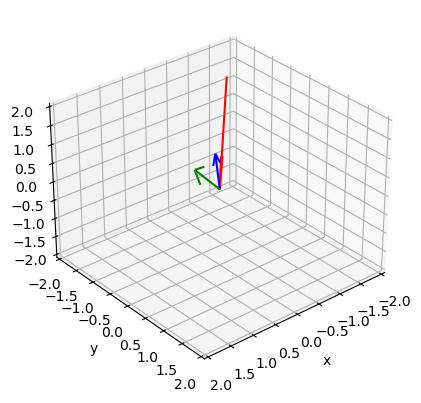

In [258]:
ax = plt.figure().add_subplot(projection='3d')

# Make the grid
origin = np.zeros(3)
# Make the direction data for the arrows

ax.quiver(-vel[0],       -vel[1],    -vel[2], vel[0],       vel[1],    vel[2], color='red')
ax.quiver(origin[0], origin[1], origin[2], normal[0], normal[1], normal[2], color='blue')
ax.quiver(origin[0], origin[1], origin[2], velp[0], velp[1], velp[2], color='green')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=30, azim=50, roll=0)
plt.show()

In [314]:
N = 10
vel = np.array([1, 0, -2])
velN = np.zeros((N, 3))

normal = np.array([0.4, 0, 1])
normal = normal/np.linalg.norm(normal)
normalN = np.zeros((N, 3))
for i in range(N):
    velN[i] = vel
    normalN[i] = normal
velp = velN - 2*velN@normalN*normalN

Ut = velN - velN@normal*normal

tw1 = Ut/np.linalg.norm(Ut)
print(tw1)
print(np.linalg.norm(tw1))
tw2 = np.cross(tw1, normal)

print(tw2)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 10 is different from 3)

In [309]:
kB = 1.380649e-23
Al_m = 44.803928e-27
T = 100
N = 10
np.dot(np.random.randn(N), tw1)

ValueError: shapes (10,) and (3,) not aligned: 10 (dim 0) != 3 (dim 0)

In [306]:
kB = 1.380649e-23
Al_m = 44.803928e-27
T = 100
N = 10
U = np.sqrt(kB*T/Al_m)*(np.random.randn(N)*tw1 + np.random.randn(N)*tw2 - np.sqrt(-2*np.log((1-np.random.rand(N))))*normal)

ValueError: operands could not be broadcast together with shapes (10,) (3,) 

In [305]:
print(U)

[ -10.85392311  -94.05416338 -391.7431983 ]


In [296]:
np.random.randn(10)

array([-1.92983475, -0.63181178,  0.4142361 , -0.74856157, -1.01294495,
       -0.52180346, -0.44314008, -0.05644121,  1.09828999,  0.42828418])

In [362]:
N = 10
vel = np.array([-1, 0, -2])


normal = np.array([-0.4, 0, 1])
normal = normal/np.linalg.norm(normal)
normalN = np.zeros((N, 3))

velp = vel - 2*vel@normal*normal

Ut = vel - vel@normal*normal

tw1 = Ut/np.linalg.norm(Ut)
print(tw1)
print(np.linalg.norm(tw1))
tw2 = np.cross(tw1, normal)

print(tw2)

kB = 1.380649e-23
Al_m = 44.803928e-27
T = 100
N = 10
U = np.sqrt(kB*T/Al_m)*(np.random.randn()*tw1 + np.random.randn()*tw2 - np.sqrt(-2*np.log((1-np.random.rand())))*normal)

[-0.92847669  0.         -0.37139068]
0.9999999999999999
[0. 1. 0.]


In [363]:
N = 50

UN = np.zeros((N, 3))
for i in range(N):
    U = np.sqrt(kB*T/Al_m)*(np.random.randn()*tw1 + np.random.randn()*tw2 - np.sqrt(-2*np.log((1-np.random.rand())))*normal)
    UN[i] = U


UN = np.divide(UN.T, np.linalg.norm(UN, axis=1)).T
print(UN)

print(np.linalg.norm(UN, axis=1))

[[ 0.80035962 -0.5973781   0.05063479]
 [ 0.44808491  0.02338931 -0.89368498]
 [ 0.78421062 -0.52546474 -0.33000077]
 [ 0.30724906  0.26551431 -0.91383815]
 [-0.16702636  0.51591197 -0.84020059]
 [ 0.45541675 -0.04184518 -0.88929442]
 [ 0.31413364 -0.43057686 -0.8461227 ]
 [ 0.37259192 -0.55682363 -0.74237639]
 [ 0.28976604  0.52508719 -0.80019941]
 [ 0.5063082   0.42434317 -0.75072291]
 [ 0.03548862 -0.24882107 -0.96789908]
 [ 0.8236368  -0.04905932 -0.56499169]
 [ 0.25813817 -0.64628938 -0.71810496]
 [ 0.97684929 -0.21385027  0.00578989]
 [-0.57163717  0.43075306 -0.69834286]
 [ 0.6037405  -0.57240311 -0.5548442 ]
 [ 0.8793797  -0.20015925 -0.43200418]
 [ 0.28546029 -0.78422599 -0.55091017]
 [ 0.7004111  -0.67737382  0.22491999]
 [ 0.41273743  0.90900049 -0.05801654]
 [ 0.19644558  0.35773491 -0.91292654]
 [-0.2262381  -0.89754679 -0.37845221]
 [ 0.95888012 -0.08945778 -0.26934404]
 [ 0.71394684  0.38514656 -0.5847581 ]
 [-0.04945082  0.48484877 -0.87319888]
 [ 0.06922318  0.24230629

In [368]:
N = 100
kB = 1.38e-23  # Boltzmann constant in J/K
T = 300  # Temperature in K
Al_m = 26.98e-3 / 6.022e23  # Mass of aluminum atom in kg

vel = np.array([-1, 0, -2])

normal = np.array([-0.4, 0, 1])
normal = normal / np.linalg.norm(normal)

velp = vel - 2 * vel @ normal * normal

Ut = vel - vel @ normal * normal

tw1 = Ut / np.linalg.norm(Ut)
print(tw1)
print(np.linalg.norm(tw1))
tw2 = np.cross(tw1, normal)

# 向量化随机数生成
randn_tw1 = np.random.randn(N)[:, np.newaxis]
randn_tw2 = np.random.randn(N)[:, np.newaxis]
rand_log = np.sqrt(-2 * np.log(1 - np.random.rand(N)))[:, np.newaxis]

# 计算U
U = np.sqrt(kB * T / Al_m) * (randn_tw1 * tw1 + randn_tw2 * tw2 - rand_log * normal)

# 归一化U
UN = U / np.linalg.norm(U, axis=1)[:, np.newaxis]

print(UN)


[-0.92847669  0.         -0.37139068]
0.9999999999999999
[[ 0.32914895  0.54219389 -0.77310203]
 [ 0.38211344 -0.33014324 -0.86313079]
 [-0.16604593 -0.71337309 -0.6808286 ]
 [ 0.932748   -0.31528962 -0.17485317]
 [-0.10677062  0.45481406 -0.884163  ]
 [-0.27532328 -0.23095456 -0.93319723]
 [ 0.79996302  0.56995855 -0.18763373]
 [ 0.03316141  0.77972559 -0.62524261]
 [ 0.66441546  0.38309082 -0.6417114 ]
 [ 0.88886787 -0.4527272  -0.07037034]
 [-0.19275984  0.58021686 -0.79132297]
 [ 0.10609862 -0.3648761  -0.92499109]
 [-0.4397784   0.03683361 -0.89735068]
 [-0.02556558 -0.81291918 -0.5818151 ]
 [ 0.5921936  -0.48228665 -0.64552794]
 [ 0.10870355  0.8452049  -0.52327068]
 [ 0.29959178  0.64250865 -0.70528533]
 [ 0.7614093  -0.64306114 -0.0820259 ]
 [-0.14095527 -0.87384915 -0.46531631]
 [-0.01174183  0.06455857 -0.99784484]
 [-0.23127756  0.38151296 -0.89496288]
 [-0.65856374  0.03892989 -0.75151731]
 [ 0.4894729  -0.06114187 -0.86987238]
 [-0.33087293 -0.04276585 -0.94270578]
 [ 0.47

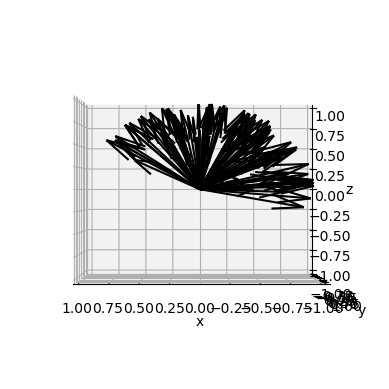

In [369]:
ax = plt.figure().add_subplot(projection='3d')

# Make the grid
origin = np.zeros((N, 3))
# Make the direction data for the arrows


ax.quiver(origin[:, 0], origin[:, 1], origin[:, 2], -UN[:, 0], -UN[:,1], -UN[:,2], color='black')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=0, azim=90, roll=0)
plt.show()

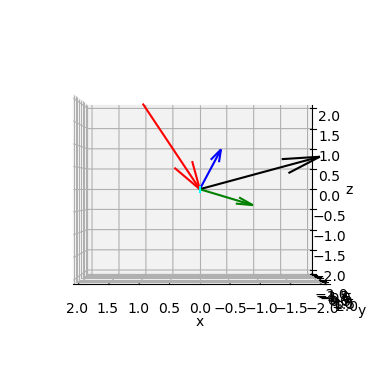

In [365]:
ax = plt.figure().add_subplot(projection='3d')

# Make the grid
origin = np.zeros(3)
# Make the direction data for the arrows

ax.quiver(-vel[0],       -vel[1],    -vel[2], vel[0],       vel[1],    vel[2], color='red')
ax.quiver(origin[0], origin[1], origin[2], normal[0], normal[1], normal[2], color='blue')
ax.quiver(origin[0], origin[1], origin[2], velp[0], velp[1], velp[2], color='black')
ax.quiver(origin[0], origin[1], origin[2], tw1[0], tw1[1], tw1[2], color='green')
ax.quiver(origin[0], origin[1], origin[2], tw2[0], tw2[1], tw2[2], color='cyan')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=0, azim=90, roll=0)
plt.show()